In [ ]:
#only the 95% of categories (43)

In [ ]:
#docker run -it --rm -v c:/workspace/jupyter:/tf -p 8888:8888 tensorflow/tensorflow:latest-gpu-jupyter
#2021-01-05
#!pip install pandas
#!pip install tensorflow_hub
#!pip install tensorflow_text
#!pip install tensorflowjs

In [1]:
import os
import numpy as np
import pandas as pd
import tensorflow as tf

np.set_printoptions(precision=3, suppress=True) # easy to read read only

from tensorflow.keras import Model, Sequential
from tensorflow.keras.layers import Activation, Dense, Embedding, GlobalAveragePooling1D
from tensorflow.keras.layers.experimental.preprocessing import TextVectorization
import tensorflow_hub as hub
import matplotlib.pyplot as plt
import json
import re

In [2]:
print("Version: ", tf.__version__)
raw_data = pd.read_csv('data/S_SURVEY_FULL.csv')
# raw_data.head()



Version:  2.4.0


In [4]:
# features / labels / Y
_cat_list = list()
_min_num = len(raw_data) * .2

for c in list(raw_data.columns)[1:(len(raw_data.columns)-1)]:
    if(raw_data[[c]].sum().tolist()[0] > _min_num):
        _cat_list.append(c)
expect = raw_data.loc[:, _cat_list]
Y = np.array(expect)
feature = np.array(raw_data.loc[:,['JSON']]).reshape(-1)
print(feature.shape,len(_cat_list))

(2543,) 6


In [6]:
# train / text / X
VOCAB_SIZE=400
encoder = tf.keras.layers.experimental.preprocessing.TextVectorization(
    max_tokens=VOCAB_SIZE)
ff = np.array([re.sub('[^0-9a-zA-Z_\\.]+', ' ', xx) for xx in feature])
encoder.adapt(ff)
print(np.array(encoder.get_vocabulary()).shape, len(encoder.get_vocabulary()))
print(ff.shape,Y.shape)
print(expect.columns)

(400,) 400
(2543,) (2543, 6)
Index(['B2C - Desktop', 'ForeSee Website Index - Desktop',
       'Multi-Channel Experience', 'Multi-Channel Shopping Experience',
       'Phone/Tablet Sites and Apps', 'Private Sector - Desktop'],
      dtype='object')


In [7]:
output_den = len(Y[0]);

model = tf.keras.Sequential()
model.add(encoder)

model.add(tf.keras.layers.Embedding(input_dim=len(encoder.get_vocabulary()),mask_zero=True,
                                    output_dim=16))
# model.add(tf.keras.layers.LSTM(64))

model.add(tf.keras.layers.Dense(256, activation='relu'))

# model.add(tf.keras.layers.Dropout(0.2))

model.add(tf.keras.layers.Dense(128, activation='tanh'))
model.add(tf.keras.layers.GlobalAveragePooling1D())
model.add(tf.keras.layers.Dense(64, activation='relu'))
model.add(tf.keras.layers.Dense(output_den, activation='sigmoid'))


# model.summary()
model.compile(optimizer='adam',
              loss=tf.keras.losses.BinaryCrossentropy(from_logits=True),
              metrics=['accuracy'])

history = model.fit(x=ff,y=Y,
                    epochs=1,batch_size=512,
                    validation_split=0.01,
                     verbose=1,
#                      callbacks=[cp_callback],
                    use_multiprocessing=True
                   )

5/5 [==============================] - 3s 427ms/step - loss: 0.6917 - accuracy: 0.2211 - val_loss: 0.6957 - val_accuracy: 0.0000e+00


In [15]:
model.pop()
model.add(tf.keras.layers.Dense(output_den, activation='sigmoid'))

In [14]:
checkpoint_path = "../checkpoint/survey_short_full_v5.ckpt"

# Create a callback that saves the model's weights
cp_callback = tf.keras.callbacks.ModelCheckpoint(filepath=checkpoint_path,
                                                 save_weights_only=True,
                                                 verbose=0)

def plotHistory(history):
    plt.plot(history.history['accuracy'])
    plt.plot(history.history['val_accuracy'])
    plt.title('model accuracy')
    plt.ylabel('accuracy')
    plt.xlabel('epoch')
    plt.legend(['train', 'test'], loc='upper left')
    plt.show()
    # summarize history for loss
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.title('model loss')
    plt.ylabel('loss')
    plt.xlabel('epoch')
    plt.legend(['train', 'test'], loc='upper left')
    plt.show()

In [ ]:
history = model.fit(x=ff,y=Y,
                    epochs=1,batch_size=512,
                    validation_split=0.1,
                     verbose=1,
                     callbacks=[cp_callback],
                    use_multiprocessing=True
                   )

# plotHistory(history)

In [21]:
history = model.fit(x=ff,y=Y,
                    epochs=600,batch_size=512,
                    validation_split=0.1,
                     verbose=1,
#                      callbacks=[cp_callback],
                    use_multiprocessing=True
                   )

Epoch 1/600
5/5 [==============================] - 1s 280ms/step - loss: 0.1311 - accuracy: 0.3571 - val_loss: 0.2331 - val_accuracy: 0.3882
Epoch 2/600
5/5 [==============================] - 1s 261ms/step - loss: 0.1301 - accuracy: 0.3667 - val_loss: 0.2304 - val_accuracy: 0.3765
Epoch 3/600
5/5 [==============================] - 1s 279ms/step - loss: 0.1310 - accuracy: 0.3680 - val_loss: 0.2289 - val_accuracy: 0.3882
Epoch 4/600
5/5 [==============================] - 1s 255ms/step - loss: 0.1286 - accuracy: 0.3645 - val_loss: 0.2258 - val_accuracy: 0.3686
Epoch 5/600
5/5 [==============================] - 1s 290ms/step - loss: 0.1285 - accuracy: 0.3636 - val_loss: 0.2352 - val_accuracy: 0.3882
Epoch 6/600
5/5 [==============================] - 1s 282ms/step - loss: 0.1300 - accuracy: 0.3628 - val_loss: 0.2302 - val_accuracy: 0.3765
Epoch 7/600
5/5 [==============================] - 1s 258ms/step - loss: 0.1280 - accuracy: 0.3628 - val_loss: 0.2298 - val_accuracy: 0.3882
Epoch 8/600
5

Epoch 59/600
5/5 [==============================] - 2s 306ms/step - loss: 0.1236 - accuracy: 0.3632 - val_loss: 0.2383 - val_accuracy: 0.3647
Epoch 60/600
5/5 [==============================] - 2s 301ms/step - loss: 0.1215 - accuracy: 0.3645 - val_loss: 0.2413 - val_accuracy: 0.3843
Epoch 61/600
5/5 [==============================] - 1s 282ms/step - loss: 0.1213 - accuracy: 0.3737 - val_loss: 0.2459 - val_accuracy: 0.3882
Epoch 62/600
5/5 [==============================] - 2s 318ms/step - loss: 0.1242 - accuracy: 0.3654 - val_loss: 0.2408 - val_accuracy: 0.3647
Epoch 63/600
5/5 [==============================] - 1s 279ms/step - loss: 0.1220 - accuracy: 0.3671 - val_loss: 0.2397 - val_accuracy: 0.3647
Epoch 64/600
5/5 [==============================] - 1s 302ms/step - loss: 0.1229 - accuracy: 0.3733 - val_loss: 0.2445 - val_accuracy: 0.3843
Epoch 65/600
5/5 [==============================] - 1s 269ms/step - loss: 0.1223 - accuracy: 0.3763 - val_loss: 0.2510 - val_accuracy: 0.4000
Epoch 

5/5 [==============================] - 1s 279ms/step - loss: 0.1104 - accuracy: 0.3781 - val_loss: 0.2635 - val_accuracy: 0.3647
Epoch 174/600
5/5 [==============================] - 1s 283ms/step - loss: 0.1116 - accuracy: 0.3741 - val_loss: 0.2646 - val_accuracy: 0.3765
Epoch 175/600
5/5 [==============================] - 1s 271ms/step - loss: 0.1104 - accuracy: 0.3702 - val_loss: 0.2636 - val_accuracy: 0.3725
Epoch 176/600
5/5 [==============================] - 2s 308ms/step - loss: 0.1105 - accuracy: 0.3746 - val_loss: 0.2654 - val_accuracy: 0.3686
Epoch 177/600
5/5 [==============================] - 1s 265ms/step - loss: 0.1111 - accuracy: 0.3837 - val_loss: 0.2623 - val_accuracy: 0.3686
Epoch 178/600
5/5 [==============================] - 1s 287ms/step - loss: 0.1112 - accuracy: 0.3833 - val_loss: 0.2660 - val_accuracy: 0.3686
Epoch 179/600
5/5 [==============================] - 1s 259ms/step - loss: 0.1110 - accuracy: 0.3789 - val_loss: 0.2643 - val_accuracy: 0.3686
Epoch 180/600

5/5 [==============================] - 1s 269ms/step - loss: 0.1067 - accuracy: 0.3855 - val_loss: 0.2840 - val_accuracy: 0.3686
Epoch 288/600
5/5 [==============================] - 1s 270ms/step - loss: 0.1041 - accuracy: 0.3877 - val_loss: 0.2823 - val_accuracy: 0.3647
Epoch 289/600
5/5 [==============================] - 1s 268ms/step - loss: 0.1066 - accuracy: 0.3881 - val_loss: 0.2784 - val_accuracy: 0.3686
Epoch 290/600
5/5 [==============================] - 1s 252ms/step - loss: 0.1028 - accuracy: 0.3912 - val_loss: 0.2810 - val_accuracy: 0.3647
Epoch 291/600
5/5 [==============================] - 1s 291ms/step - loss: 0.1026 - accuracy: 0.3872 - val_loss: 0.2771 - val_accuracy: 0.3647
Epoch 292/600
5/5 [==============================] - 1s 262ms/step - loss: 0.1026 - accuracy: 0.3807 - val_loss: 0.2772 - val_accuracy: 0.3647
Epoch 293/600
5/5 [==============================] - 1s 269ms/step - loss: 0.1031 - accuracy: 0.3890 - val_loss: 0.2787 - val_accuracy: 0.3647
Epoch 294/600

5/5 [==============================] - 1s 255ms/step - loss: 0.0986 - accuracy: 0.3942 - val_loss: 0.2896 - val_accuracy: 0.3569
Epoch 402/600
5/5 [==============================] - 1s 283ms/step - loss: 0.0969 - accuracy: 0.3851 - val_loss: 0.2885 - val_accuracy: 0.3608
Epoch 403/600
5/5 [==============================] - 1s 254ms/step - loss: 0.0981 - accuracy: 0.3859 - val_loss: 0.2929 - val_accuracy: 0.3647
Epoch 404/600
5/5 [==============================] - 1s 268ms/step - loss: 0.0959 - accuracy: 0.3894 - val_loss: 0.2957 - val_accuracy: 0.3647
Epoch 405/600
5/5 [==============================] - 1s 252ms/step - loss: 0.0969 - accuracy: 0.3916 - val_loss: 0.2914 - val_accuracy: 0.3569
Epoch 406/600
5/5 [==============================] - 1s 271ms/step - loss: 0.0963 - accuracy: 0.3855 - val_loss: 0.2903 - val_accuracy: 0.3490
Epoch 407/600
5/5 [==============================] - 1s 297ms/step - loss: 0.0985 - accuracy: 0.3947 - val_loss: 0.2907 - val_accuracy: 0.3647
Epoch 408/600

5/5 [==============================] - 2s 318ms/step - loss: 0.0890 - accuracy: 0.3824 - val_loss: 0.3014 - val_accuracy: 0.3608
Epoch 516/600
5/5 [==============================] - 2s 329ms/step - loss: 0.0889 - accuracy: 0.3824 - val_loss: 0.3038 - val_accuracy: 0.3647
Epoch 517/600
5/5 [==============================] - 1s 284ms/step - loss: 0.0885 - accuracy: 0.3842 - val_loss: 0.3065 - val_accuracy: 0.3647
Epoch 518/600
5/5 [==============================] - 1s 266ms/step - loss: 0.0898 - accuracy: 0.3872 - val_loss: 0.3079 - val_accuracy: 0.3647
Epoch 519/600
5/5 [==============================] - 1s 286ms/step - loss: 0.0895 - accuracy: 0.3864 - val_loss: 0.3030 - val_accuracy: 0.3529
Epoch 520/600
5/5 [==============================] - 1s 288ms/step - loss: 0.0904 - accuracy: 0.3837 - val_loss: 0.3030 - val_accuracy: 0.3647
Epoch 521/600
5/5 [==============================] - 1s 272ms/step - loss: 0.0898 - accuracy: 0.3833 - val_loss: 0.3051 - val_accuracy: 0.3608
Epoch 522/600

80/80 [==============================] - 1s 6ms/step - loss: 0.1178 - accuracy: 0.3779


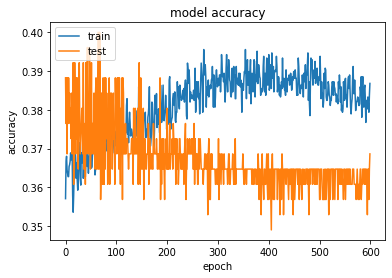

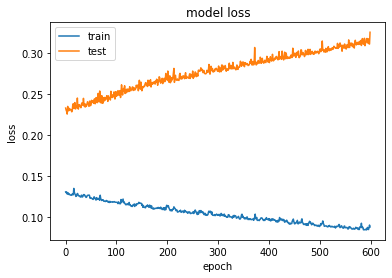

In [22]:
model.evaluate(ff,Y)
plotHistory(history)

In [13]:
# model.load_weights(checkpoint_path)
# model.save_weights(checkpoint_path)
# model.save('../model/survey_short_full')


In [23]:
all_predict=model.predict(ff[:])
error_matrix=(np.absolute(Y - all_predict) > .5).astype(int)
_total = error_matrix.sum()
print(_total, len(Y), _total / len(Y), _total / len(Y) / len(Y[0]))
print(np.average(error_matrix.sum(axis=1) / len(Y[0])))

7052 2543 2.7731026346834446 0.4621837724472408
0.46218377244724085


In [24]:
full_expect = raw_data[raw_data.columns[1:(len(raw_data.columns)-1)]]
np_pred = (all_predict > 0.5).astype(int)
full_predict = full_expect.copy()
for col in full_predict.columns:
    full_predict[col].values[:] = 0
for idx, name in enumerate (_cat_list) :
    full_predict[name] = np_pred[:,idx]
full_predict = full_predict[full_expect.columns]
full_error=np.absolute(np.array(full_expect) - np.array(full_predict))
_total = full_error.sum()
print('Wrong:', _total, len(full_error), 'Wrong in row:', _total / len(full_error), _total / len(full_error) / len(full_error[0]))

Wrong: 28898 2543 Wrong in row: 11.363743609909555 0.01775584939048368


In [16]:
np_pred[:,1].shape

(2543,)

In [17]:
import tensorflowjs as tfjs

tfjs.converters.save_keras_model(model, '../checkpoint/js')

/usr/local/lib/python3.6/dist-packages/tensorflowjs/converters/keras_h5_conversion.py:123: H5pyDeprecationWarning: The default file mode will change to 'r' (read-only) in h5py 3.0. To suppress this warning, pass the mode you need to h5py.File(), or set the global default h5.get_config().default_file_mode, or set the environment variable H5PY_DEFAULT_READONLY=1. Available modes are: 'r', 'r+', 'w', 'w-'/'x', 'a'. See the docs for details.
  return h5py.File(h5file)
